# Análisis de redes: Sistema de contratación del Estado (obras) y la relación entre municipalidades distritales en todo el departamento de Lima y las empresas ganadoras en el año 2023

## Paso 1: Importamos nuestra data

In [16]:
!pip install -q openpyxl

In [17]:
import pandas as pd

lima_distritos = pd.read_excel("data/distritos_lima_final.xlsx", engine='openpyxl')

lima_distritos.head()

Distritos  ZRINCON_EIRL  MIROVAL_SAC  METACONTROL_SAC  CORONEL_EJECUTORES  \
0         Ate             1            2                4                   2   
1    Barranco             0            0                0                   0   
2       Brena             0            0                0                   0   
3  Carabayllo             1            0                1                   0   
4  Chorrillos             0            0                0                   0   

   WAR_SAC  GIMAHU  HUAYCHAOLA_SAC  JAGIXA  CONSTRUCTORA_DOLPHIN_SAC  ...  \
0        1       1               3       1                         1  ...   
1        0       0               0       0                         0  ...   
2        0       0               0       0                         0  ...   
3        0       0               0       0                         0  ...   
4        0       0               0       0                         0  ...   

   INVERSIONES_CAVIANDINA_SAC  DAZER_CONSTRUCTION_SAC  GRALAZ_SAC  \
0                           0                       0           0   
1                           0                       0           0   
2                           0                       0           0   
3                           0                       0           0   
4                           0                       0           0   

   ECOTRAM_EIRL  CORPORACION_INGENIERIA_Y_DESARROLLO_SAC  \
0             0                                        0   
1             0                                        0   
2             0                                        0   
3             0                                        0   
4             0                                        0   

   W&W_CONSTRUCTORES_SAC  GEOTEGG_SAC  MAKI_ASOCIADOS_SAC  COINVEFER_EIRL  \
0                      0            0                   0               0   
1                      0            0                   0               0   
2                      0            0                   0               0   
3                      0            0                   0               0   
4                      0            0                   0               0   

   G&P_EL_ROBLE_SAC  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  

[5 rows x 445 columns]

El Sistema de Contratación del Estado en el ámbito de obras públicas ha sido fundamental para establecer relaciones entre las municipalidades distritales del departamento de Lima y las empresas ganadoras en el año 2023. En nuestra base de datos, cada fila representa una municipalidad distrital, mientras que las columnas reflejan las empresas que obtuvieron contratos de obras. La asignación de valores en la matriz indica el número de obras ganadas por cada empresa: un valor de 1 indica que la empresa ganó una obra, un 2 indica dos obras, y un 0 señala que la empresa no obtuvo contratos en esa municipalidad. Esta estructura de datos permite analizar la distribución de contratos y evaluar la competencia entre las empresas en el contexto de las municipalidades, así como identificar patrones en la adjudicación de obras públicas en Lima durante este periodo.

### Le damos un vistazo a nuestra base de datos

In [20]:
print(lima_distritos.dtypes)

Distritos                object
ZRINCON_EIRL              int64
MIROVAL_SAC               int64
METACONTROL_SAC           int64
CORONEL_EJECUTORES        int64
                          ...  
W&W_CONSTRUCTORES_SAC     int64
GEOTEGG_SAC               int64
MAKI_ASOCIADOS_SAC        int64
COINVEFER_EIRL            int64
G&P_EL_ROBLE_SAC          int64
Length: 445, dtype: object


In [22]:
print(lima_distritos['Distritos'].unique())

['Ate' 'Barranco' 'Brena' 'Carabayllo' 'Chorrillos' 'Cieneguilla' 'Comas'
 'El_Agustino' 'Independencia' 'La_Molina' 'La_Victoria' 'Lince'
 'Los_Olivos' 'Lurigancho(Chosica)' 'Lurin' 'Magdalena_del_Mar'
 'Miraflores' 'Pucusana' 'Puente_Piedra' 'Punta_Hermosa' 'Punta_Negra'
 'Rimac' 'San_Borja' 'San_Isidro' 'San_Juan_de_Lurigancho'
 'San_Juan_de_Miraflores' 'San_Luis' 'San_Martin_de_Porres' 'San_Miguel'
 'Santa_Anita' 'Santa_Maria_del_Mar' 'Santa_Rosa' 'Santiago_de_Surco'
 'Surquillo' 'Villa_El_Salvador' 'Villa_Maria_del_Triunfo' 'Paramonga'
 'Pativilca' 'Supe' 'Cajatambo' 'Arahuay' 'Santa_Rosa_de_Quives'
 'San_Vicente_de_Cañete' 'Asia' 'Cerro_Azul' 'Chilca' 'Imperial' 'Mala'
 'Quilmana' 'Santa_Cruz_de_Flores' 'Huaral' 'Aucallama' 'Chancay' 'Ihuari'
 'Santa_Cruz_de_Andamarca' 'Antioquia' 'Chicla' 'Huachupampa' 'Huanza'
 'Huarochiri' 'Ricardo_Palma' 'San_Antonio' 'Santiago_de_Anchucaya'
 'Santo_Domingo_de_los_Olleros' 'Surco(Huarochiri)' 'Huacho' 'Huaura'
 'Sayan' 'Vegueta' 'Hongos' 'Oma

In [24]:
print(lima_distritos.describe())

       ZRINCON_EIRL  MIROVAL_SAC  METACONTROL_SAC  CORONEL_EJECUTORES  \
count     79.000000    79.000000        79.000000           79.000000   
mean       0.101266     0.037975         0.113924            0.050633   
std        0.441296     0.250284         0.554408            0.272629   
min        0.000000     0.000000         0.000000            0.000000   
25%        0.000000     0.000000         0.000000            0.000000   
50%        0.000000     0.000000         0.000000            0.000000   
75%        0.000000     0.000000         0.000000            0.000000   
max        3.000000     2.000000         4.000000            2.000000   

         WAR_SAC     GIMAHU  HUAYCHAOLA_SAC     JAGIXA  \
count  79.000000  79.000000       79.000000  79.000000   
mean    0.012658   0.012658        0.088608   0.025316   
std     0.112509   0.112509        0.398390   0.158088   
min     0.000000   0.000000        0.000000   0.000000   
25%     0.000000   0.000000        0.000000   0.0000

## Paso 2: Creamos una red bipartita

Una red bipartita es un tipo de estructura de red que se compone de dos conjuntos de nodos, donde las conexiones (o aristas) solo pueden existir entre nodos de diferentes conjuntos, y no dentro del mismo conjunto.

### Antes que todo, establecemos nuestra columna "Distritos" como índice

In [28]:
lima_distritos.set_index('Distritos', inplace=True)

In [30]:
#Revisamos si existen valores perdidos
print(lima_distritos.isnull().sum())

ZRINCON_EIRL             0
MIROVAL_SAC              0
METACONTROL_SAC          0
CORONEL_EJECUTORES       0
WAR_SAC                  0
                        ..
W&W_CONSTRUCTORES_SAC    0
GEOTEGG_SAC              0
MAKI_ASOCIADOS_SAC       0
COINVEFER_EIRL           0
G&P_EL_ROBLE_SAC         0
Length: 444, dtype: int64


### ¡Ahora sí! Veamos el número de nodos y aristas

In [34]:
import networkx as nx

victoria = nx.Graph()  

municipalidades = lima_distritos.index.tolist()
victoria.add_nodes_from(municipalidades, bipartite=0)

empresas = lima_distritos.columns.tolist()
victoria.add_nodes_from(empresas, bipartite=1)

for distrito in lima_distritos.index:
    for empresa in lima_distritos.columns:
        if lima_distritos.loc[distrito, empresa] > 0:
            victoria.add_edge(distrito, empresa, weight=lima_distritos.loc[distrito, empresa])

print(f"Número de nodos: {victoria.number_of_nodes()}")
print(f"Número de aristas: {victoria.number_of_edges()}")

Número de nodos: 523
Número de aristas: 646


## Paso 3: Análisis y visualización

### Vemos las aristas y sus pesos respectivos

In [38]:
for edge in victoria.edges(data=True):
    print(edge)

('Ate', 'ZRINCON_EIRL', {'weight': 1})
('Ate', 'MIROVAL_SAC', {'weight': 2})
('Ate', 'METACONTROL_SAC', {'weight': 4})
('Ate', 'CORONEL_EJECUTORES', {'weight': 2})
('Ate', 'WAR_SAC', {'weight': 1})
('Ate', 'GIMAHU', {'weight': 1})
('Ate', 'HUAYCHAOLA_SAC', {'weight': 3})
('Ate', 'JAGIXA', {'weight': 1})
('Ate', 'CONSTRUCTORA_DOLPHIN_SAC', {'weight': 1})
('Ate', 'JD&HN', {'weight': 1})
('Ate', 'JUSAL_INVERSIONES', {'weight': 1})
('Ate', 'SIADEC_INGENIEROS_SAC', {'weight': 2})
('Ate', 'ENMANUEL&LUCIANO', {'weight': 1})
('Ate', 'VENTURO', {'weight': 1})
('Ate', 'HELICONIAS_DEL_HUALLAGA', {'weight': 1})
('Ate', 'LUCEMAR_EIRL', {'weight': 1})
('Ate', 'CASCINA', {'weight': 1})
('Ate', 'PJK', {'weight': 1})
('Barranco', 'NEBCAS_SAC', {'weight': 1})
('Barranco', 'LUMAYJE_SAC', {'weight': 3})
('Barranco', 'ESPINAR_SAC', {'weight': 1})
('Barranco', 'COSISE_CONSTRUCTORA', {'weight': 1})
('Barranco', 'INGEOBRAS_SAC', {'weight': 1})
('Barranco', 'GESTION&CONSTRUCCION_SAC', {'weight': 1})
('Barranco

### 3.1. Visualizamos la red

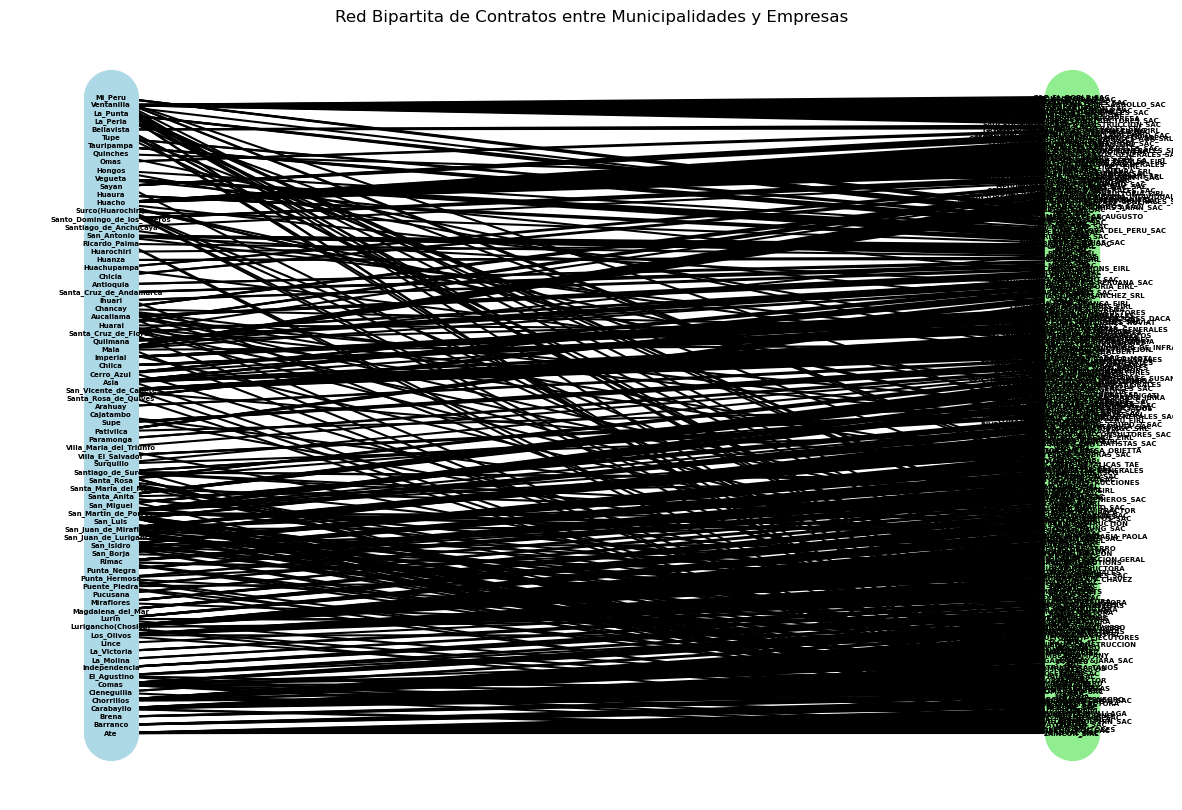

In [41]:
import matplotlib.pyplot as plt

pos = nx.bipartite_layout(victoria, nodes=municipalidades)  

plt.figure(figsize=(15, 10))
nx.draw_networkx_nodes(victoria, pos, nodelist=municipalidades, node_color="lightblue", node_size=1500)
nx.draw_networkx_nodes(victoria, pos, nodelist=empresas, node_color="lightgreen", node_size=1500)
nx.draw_networkx_edges(victoria, pos, width=1.5)

nx.draw_networkx_labels(victoria, pos, font_size=5, font_weight="bold")

plt.title("Red Bipartita de Contratos entre Municipalidades y Empresas")
plt.axis('off')  
plt.show()

### Ups... Intentemos de otra forma

In [44]:
import matplotlib.pyplot as plt

pos = nx.spring_layout(victoria, seed=42)  

plt.figure(figsize=(10, 7))
nx.draw_networkx_nodes(victoria, pos, nodelist=municipalidades, node_color="lightblue", node_size=1500, label="Municipalidades")
nx.draw_networkx_nodes(victoria, pos, nodelist=empresas, node_color="lightgreen", node_size=1500, label="Empresas")
nx.draw_networkx_edges(victoria, pos, width=1.5)

nx.draw_networkx_labels(victoria, pos, font_size=10, font_weight="bold")

plt.legend(["Municipalidades", "Empresas"])
plt.title("Red Bipartita de Contratos entre Municipalidades y Empresas")
plt.show()

### Probemos otra forma...

In [50]:
import networkx as nx
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 15))

pos = nx.spring_layout(victoria, k=0.3, iterations=20)

nx.draw_networkx_nodes(victoria, pos, nodelist=municipalidades, node_color="lightblue", node_size=500)

nx.draw_networkx_nodes(victoria, pos, nodelist=empresas, node_color="lightgreen", node_size=500)

nx.draw_networkx_edges(victoria, pos, width=1.0, alpha=0.6)

nx.draw_networkx_labels(victoria, pos, font_size=7, font_weight="bold")

plt.title("Red Bipartita de Contratos entre Municipalidades y Empresas", fontsize=15)
plt.axis('off')  

plt.show()

### Mejoramos la visualización

In [112]:
from pyvis.network import Network
import networkx as nx

net = Network(height="750px", width="100%", notebook=True)

for municipio in municipalidades: 
    net.add_node(str(municipio), label=str(municipio), color='lightblue', size=20)

for empresa in empresas:  
    net.add_node(str(empresa), label=str(empresa), color='lightgreen', size=20)

for u, v in victoria.edges():
    if str(u) not in net.get_nodes():
        net.add_node(str(u), label=str(u), color='lightblue' if u in municipalidades else 'lightgreen', size=20)
    if str(v) not in net.get_nodes():
        net.add_node(str(v), label=str(v), color='lightblue' if v in municipalidades else 'lightgreen', size=20)
    
    net.add_edge(str(u), str(v))

net.repulsion(node_distance=300, spring_length=150)

net.show("red_bipartita_interactiva.html")

red_bipartita_interactiva.html


### 3.2. Agrupamiento por peso

En este caso comprendemos el peso en torno al número de contratos que ha ganado una empresa en un determinado distrito

### Contratos iguales o mayores a 2

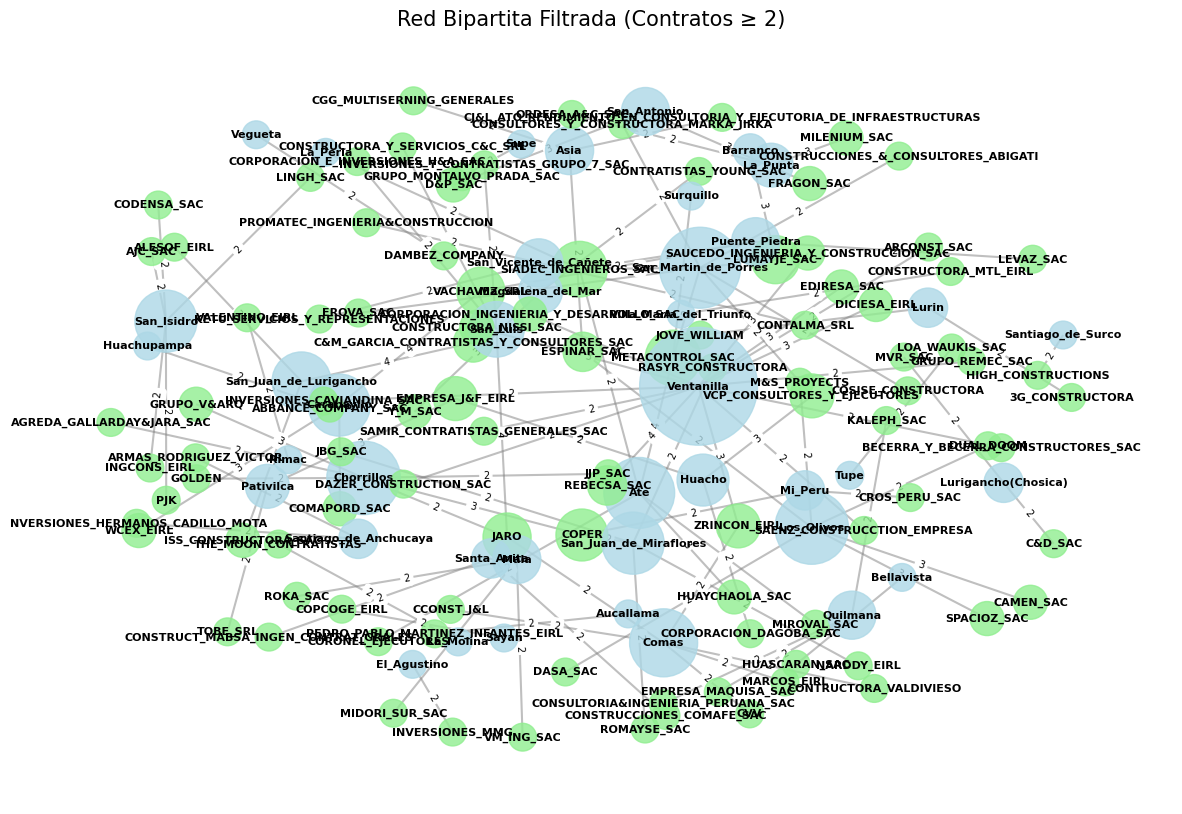

In [62]:
import matplotlib.pyplot as plt
import networkx as nx

min_contratos = 2
victoria_filtered = nx.Graph()

for distrito in lima_distritos.index:
    for empresa in lima_distritos.columns:
        if lima_distritos.loc[distrito, empresa] >= min_contratos:
            victoria_filtered.add_edge(distrito, empresa, weight=lima_distritos.loc[distrito, empresa])

pos = nx.spring_layout(victoria_filtered, k=0.3, iterations=20)

municipalidades = [n for n in victoria_filtered.nodes() if n in lima_distritos.index]
empresas = [n for n in victoria_filtered.nodes() if n not in lima_distritos.index]

color_map = ["lightblue" if node in municipalidades else "lightgreen" for node in victoria_filtered.nodes()]

node_sizes = []
for node in victoria_filtered.nodes():
    if node in municipalidades:
        total_contratos = sum([victoria_filtered[u][v]['weight'] for u, v in victoria_filtered.edges(node)])
    else:
        total_contratos = sum([victoria_filtered[u][v]['weight'] for u, v in victoria_filtered.edges(node)])
    node_sizes.append(total_contratos * 200) 

plt.figure(figsize=(15, 10))
nx.draw_networkx_nodes(victoria_filtered, pos, node_color=color_map, node_size=node_sizes, alpha=0.8)
nx.draw_networkx_edges(victoria_filtered, pos, width=1.5, alpha=0.5, edge_color="grey")

nx.draw_networkx_labels(victoria_filtered, pos, font_size=8, font_weight="bold")

edge_labels = nx.get_edge_attributes(victoria_filtered, 'weight')
nx.draw_networkx_edge_labels(victoria_filtered, pos, edge_labels=edge_labels, font_size=7)

plt.title("Red Bipartita Filtrada (Contratos ≥ 2)", fontsize=15)
plt.axis('off')  
plt.show()

### Contratos iguales o mayores a 3

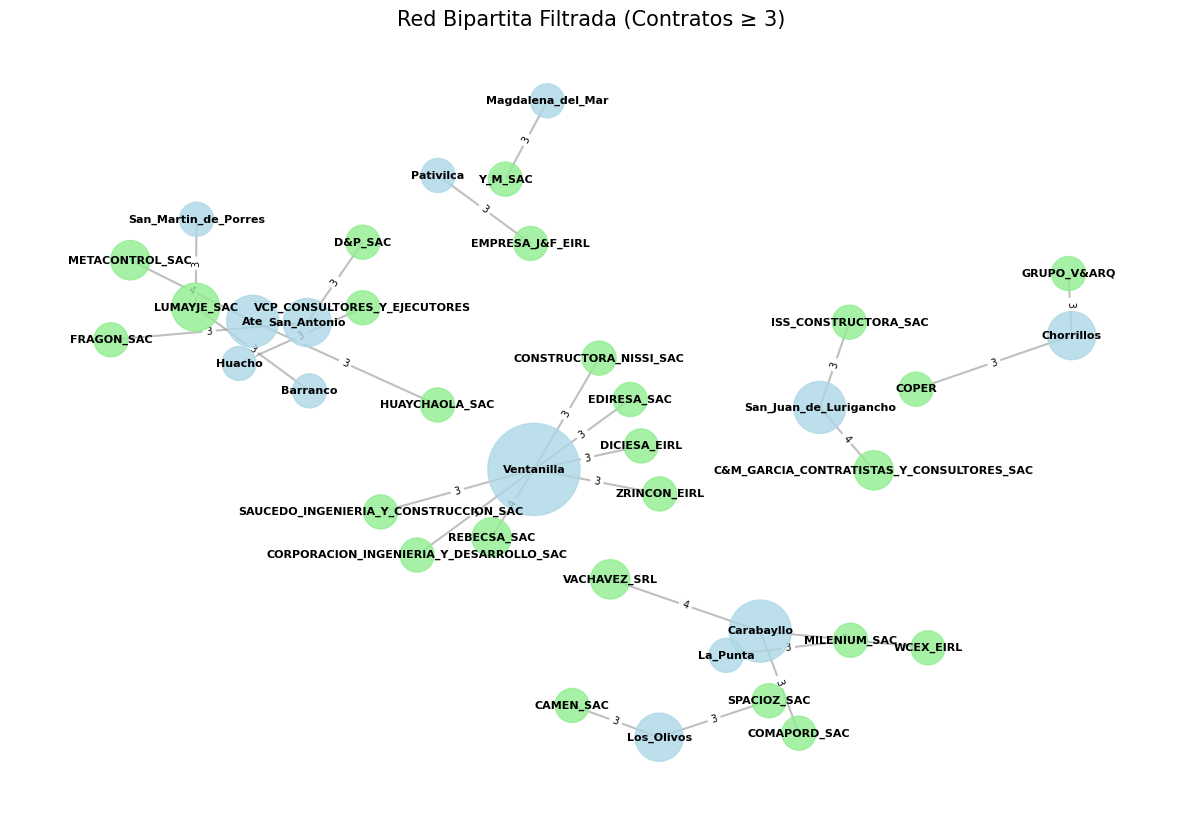

In [65]:
import matplotlib.pyplot as plt
import networkx as nx

min_contratos_3 = 3
victoria_filtered_3 = nx.Graph()

for distrito in lima_distritos.index:
    for empresa in lima_distritos.columns:
        if lima_distritos.loc[distrito, empresa] >= min_contratos_3:
            victoria_filtered_3.add_edge(distrito, empresa, weight=lima_distritos.loc[distrito, empresa])

pos = nx.spring_layout(victoria_filtered_3, k=0.3, iterations=20)

municipalidades = [n for n in victoria_filtered_3.nodes() if n in lima_distritos.index]
empresas = [n for n in victoria_filtered_3.nodes() if n not in lima_distritos.index]

color_map = ["lightblue" if node in municipalidades else "lightgreen" for node in victoria_filtered_3.nodes()]

node_sizes = []
for node in victoria_filtered_3.nodes():
    if node in municipalidades:
        total_contratos = sum([victoria_filtered_3[u][v]['weight'] for u, v in victoria_filtered_3.edges(node)])
    else:
        total_contratos = sum([victoria_filtered_3[u][v]['weight'] for u, v in victoria_filtered_3.edges(node)])
    node_sizes.append(total_contratos * 200) 

plt.figure(figsize=(15, 10))
nx.draw_networkx_nodes(victoria_filtered_3, pos, node_color=color_map, node_size=node_sizes, alpha=0.8)
nx.draw_networkx_edges(victoria_filtered_3, pos, width=1.5, alpha=0.5, edge_color="grey")

nx.draw_networkx_labels(victoria_filtered_3, pos, font_size=8, font_weight="bold")

edge_labels = nx.get_edge_attributes(victoria_filtered_3, 'weight')
nx.draw_networkx_edge_labels(victoria_filtered_3, pos, edge_labels=edge_labels, font_size=7)

plt.title("Red Bipartita Filtrada (Contratos ≥ 3)", fontsize=15)
plt.axis('off')  
plt.show()

### 3.3. Agrupamiento de comunidades

In [70]:
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.cm as cm

communities = list(nx.algorithms.community.greedy_modularity_communities(victoria))

plt.figure(figsize=(15, 10))

pos = nx.spring_layout(victoria, k=0.15, iterations=50, seed=42)  

colors = plt.colormaps['Set1'].colors

node_color_map = {}
for i, community in enumerate(communities):
    for node in community:
        node_color_map[node] = colors[i % len(colors)]  

node_colors = [node_color_map[node] for node in victoria.nodes()]

nx.draw_networkx_nodes(victoria, pos, node_color=node_colors, node_size=800, alpha=0.9)

nx.draw_networkx_edges(victoria, pos, width=1.5, alpha=0.5, edge_color="grey")

nx.draw_networkx_labels(victoria, pos, font_size=8, font_weight="bold")

plt.title("Red Bipartita con Detección de Comunidades", fontsize=15)
plt.axis('off') 

plt.show()

### No es el mejor resultado, pero la vida continua...

### 3.4. Visualización interactiva de Comunidades

In [76]:
from pyvis.network import Network
import networkx as nx
import matplotlib.pyplot as plt 

comunidades = list(nx.algorithms.community.greedy_modularity_communities(victoria))

net = Network(height="750px", width="100%", notebook=True)

colors = plt.colormaps['Set1'].colors

for i, community in enumerate(comunidades):
    color = colors[i % len(colors)]  
    for node in community:
        net.add_node(str(node), label=str(node), color=color)  

for u, v, data in victoria.edges(data=True):
    weight = data.get('weight', 1)  
    net.add_edge(str(u), str(v), value=int(weight))  

net.repulsion(node_distance=300, spring_length=150)

net.show("red_interactiva.html")

red_interactiva.html


### Podemos cambiar el color a las municipalidades

In [93]:
#Hacemos una lista primero
lista_distritos = lima_distritos.index.tolist()

print(lista_distritos)

['Ate', 'Barranco', 'Brena', 'Carabayllo', 'Chorrillos', 'Cieneguilla', 'Comas', 'El_Agustino', 'Independencia', 'La_Molina', 'La_Victoria', 'Lince', 'Los_Olivos', 'Lurigancho(Chosica)', 'Lurin', 'Magdalena_del_Mar', 'Miraflores', 'Pucusana', 'Puente_Piedra', 'Punta_Hermosa', 'Punta_Negra', 'Rimac', 'San_Borja', 'San_Isidro', 'San_Juan_de_Lurigancho', 'San_Juan_de_Miraflores', 'San_Luis', 'San_Martin_de_Porres', 'San_Miguel', 'Santa_Anita', 'Santa_Maria_del_Mar', 'Santa_Rosa', 'Santiago_de_Surco', 'Surquillo', 'Villa_El_Salvador', 'Villa_Maria_del_Triunfo', 'Paramonga', 'Pativilca', 'Supe', 'Cajatambo', 'Arahuay', 'Santa_Rosa_de_Quives', 'San_Vicente_de_Cañete', 'Asia', 'Cerro_Azul', 'Chilca', 'Imperial', 'Mala', 'Quilmana', 'Santa_Cruz_de_Flores', 'Huaral', 'Aucallama', 'Chancay', 'Ihuari', 'Santa_Cruz_de_Andamarca', 'Antioquia', 'Chicla', 'Huachupampa', 'Huanza', 'Huarochiri', 'Ricardo_Palma', 'San_Antonio', 'Santiago_de_Anchucaya', 'Santo_Domingo_de_los_Olleros', 'Surco(Huarochiri)'

In [89]:
from pyvis.network import Network
import networkx as nx
import matplotlib.pyplot as plt 

comunidades = list(nx.algorithms.community.greedy_modularity_communities(victoria))

lista_distritos = lima_distritos.index.tolist()

net = Network(height="750px", width="100%", notebook=True)

colors = plt.colormaps['Set1'].colors

distrito_color = 'blue'  # Cambia este color al que prefieras

for i, community in enumerate(comunidades):
    color = colors[i % len(colors)]  
    for node in community:
        if str(node) in lista_distritos:  
            net.add_node(str(node), label=str(node), color=distrito_color)  
        else:
            net.add_node(str(node), label=str(node), color=color)  

for u, v, data in victoria.edges(data=True):
    weight = data.get('weight', 1)  
    net.add_edge(str(u), str(v), value=int(weight))  

net.repulsion(node_distance=300, spring_length=150)

net.show("red_interactiva.html")

red_interactiva.html


### 3.5. Grado de los nodos

In [116]:
grado_nodos = dict(victoria.degree())
print(grado_nodos)

{'Ate': 18, 'Barranco': 7, 'Brena': 4, 'Carabayllo': 24, 'Chorrillos': 24, 'Cieneguilla': 3, 'Comas': 17, 'El_Agustino': 6, 'Independencia': 6, 'La_Molina': 2, 'La_Victoria': 3, 'Lince': 1, 'Los_Olivos': 19, 'Lurigancho(Chosica)': 29, 'Lurin': 10, 'Magdalena_del_Mar': 8, 'Miraflores': 6, 'Pucusana': 2, 'Puente_Piedra': 5, 'Punta_Hermosa': 6, 'Punta_Negra': 5, 'Rimac': 16, 'San_Borja': 10, 'San_Isidro': 19, 'San_Juan_de_Lurigancho': 8, 'San_Juan_de_Miraflores': 22, 'San_Luis': 7, 'San_Martin_de_Porres': 36, 'San_Miguel': 5, 'Santa_Anita': 14, 'Santa_Maria_del_Mar': 1, 'Santa_Rosa': 8, 'Santiago_de_Surco': 10, 'Surquillo': 3, 'Villa_El_Salvador': 3, 'Villa_Maria_del_Triunfo': 2, 'Paramonga': 2, 'Pativilca': 6, 'Supe': 5, 'Cajatambo': 2, 'Arahuay': 2, 'Santa_Rosa_de_Quives': 4, 'San_Vicente_de_Cañete': 20, 'Asia': 12, 'Cerro_Azul': 5, 'Chilca': 8, 'Imperial': 10, 'Mala': 15, 'Quilmana': 8, 'Santa_Cruz_de_Flores': 3, 'Huaral': 9, 'Aucallama': 6, 'Chancay': 9, 'Ihuari': 2, 'Santa_Cruz_de_An

### Distribución de grados

In [119]:
import matplotlib.pyplot as plt

grados = [grado for _, grado in grado_nodos.items()]

plt.figure(figsize=(10, 6))
plt.hist(grados, bins=range(max(grados) + 2), align='left', color='lightblue', edgecolor='black')
plt.title('Distribución de Grado de los Nodos')
plt.xlabel('Grado')
plt.ylabel('Frecuencia')
plt.xticks(range(max(grados) + 1))
plt.show()

El grado de un nodo en una red representa el número de conexiones (o aristas) que tiene dicho nodo.

## Paso 4: Exploración

In [142]:
#Vemos el tipo de red, si sale "True" es porque es una red bipartita
print(nx.is_bipartite(victoria))

True


In [146]:
#Contamos el número de nodos y aristas
num_nodes = len(victoria.nodes)
num_edges = len(victoria.edges)
print(f"Número de nodos: {num_nodes}, Número de aristas: {num_edges}")

Número de nodos: 523, Número de aristas: 646


### 4.1. Connectivity

In [155]:
#Para evaluar la conectividad de una red bipartita, hay que tener en cuenta que el concepto de conectividad puede diferir.

is_connected = nx.is_connected(victoria)  
print(f"¿Está conectada la red? {is_connected}")

if not is_connected:
    components = list(nx.connected_components(victoria)) 
    print(f"Número de componentes conectadas: {len(components)}")
    
    sizes = [len(c) for c in sorted(components, key=len, reverse=True)]
    print(f"Tamaño de cada componente: {sizes}")

isolates = list(nx.isolates(victoria))
print(f"Nodos aislados: {isolates}")

¿Está conectada la red? False
Número de componentes conectadas: 21
Tamaño de cada componente: [446, 7, 6, 6, 6, 5, 5, 5, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 1]
Nodos aislados: ['ALTAS_CUMBRES_SAC']


Como se observa, la red no está conectada ('False') porque al menos un par de nodos en la red no tiene un camino que los una. Asimismo, el número de componentes conectados nos indica cuántos grupos de nodos están conectados entre sí. Por otro lado, el tamaño de cada componente se refiere a la cantidad de nodos que contiene cada uno de esos grupos conectados (esto nos ayuda a comprender cómo es que se distribuyen los nodos dentro de una red). Y, finalmente, los nodos aislados ('ALTAS_CUMBRES_SAC') son aquellos que no están conectados con ningún otro.

### 4.2. Distance

#### 4.2.1. Diámetro de la Red

In [163]:
import networkx as nx

largest_bipartite_nodes = max(nx.connected_components(victoria), key=len)

victoria_largest = victoria.subgraph(largest_bipartite_nodes)

diameter = nx.diameter(victoria_largest)
print(f"Diámetro de la red bipartita: {diameter}")

Diámetro de la red bipartita: 12


El diámetro de una red bipartita es la longitud máxima del camino más corto entre todos los pared de nodos en la red.

#### 4.2.2. Geodesias

In [190]:
geodesics = dict(nx.all_pairs_shortest_path_length(victoria))

MatrixGeo = [[geodesics.get(n, {}).get(m) for m in victoria.nodes] for n in victoria.nodes]

MatrixGeo_DF = pd.DataFrame(MatrixGeo, index=victoria.nodes, columns=victoria.nodes)

print(MatrixGeo_DF)

                       Ate  Barranco  Brena  Carabayllo  Chorrillos  \
Ate                    0.0       4.0    4.0         2.0         4.0   
Barranco               4.0       0.0    4.0         4.0         4.0   
Brena                  4.0       4.0    0.0         2.0         2.0   
Carabayllo             2.0       4.0    2.0         0.0         2.0   
Chorrillos             4.0       4.0    2.0         2.0         0.0   
...                    ...       ...    ...         ...         ...   
W&W_CONSTRUCTORES_SAC  3.0       5.0    5.0         3.0         3.0   
GEOTEGG_SAC            3.0       5.0    5.0         3.0         3.0   
MAKI_ASOCIADOS_SAC     3.0       5.0    5.0         3.0         3.0   
COINVEFER_EIRL         3.0       5.0    5.0         3.0         3.0   
G&P_EL_ROBLE_SAC       3.0       5.0    5.0         3.0         3.0   

                       Cieneguilla  Comas  El_Agustino  Independencia  \
Ate                            2.0    2.0          2.0            6.0   
B

In [232]:
#reemplazamos los 'NA' por 0
MatrixGeo_DF.fillna(0, inplace=True)
print(MatrixGeo_DF)

                       Ate  Barranco  Brena  Carabayllo  Chorrillos  \
Ate                    0.0       4.0    4.0         2.0         4.0   
Barranco               4.0       0.0    4.0         4.0         4.0   
Brena                  4.0       4.0    0.0         2.0         2.0   
Carabayllo             2.0       4.0    2.0         0.0         2.0   
Chorrillos             4.0       4.0    2.0         2.0         0.0   
...                    ...       ...    ...         ...         ...   
W&W_CONSTRUCTORES_SAC  3.0       5.0    5.0         3.0         3.0   
GEOTEGG_SAC            3.0       5.0    5.0         3.0         3.0   
MAKI_ASOCIADOS_SAC     3.0       5.0    5.0         3.0         3.0   
COINVEFER_EIRL         3.0       5.0    5.0         3.0         3.0   
G&P_EL_ROBLE_SAC       3.0       5.0    5.0         3.0         3.0   

                       Cieneguilla  Comas  El_Agustino  Independencia  \
Ate                            2.0    2.0          2.0            6.0   
B

La siguiente tabla nos muestra las distancias más cortas entre todos los pares de nodos en la red.

#### 4.2.3. Tabla de Frecuencia: Geodesias

In [194]:
import numpy as np
frequency_table = pd.DataFrame(np.unique(MatrixGeo_DF.values, return_counts=True), index=['valor', 'freq']).T.set_index('valor')
print(frequency_table)

          freq
valor         
0.0    74793.0
1.0     1292.0
2.0     9662.0
3.0    11238.0
4.0    58346.0
5.0    21090.0
6.0    66700.0
7.0     8964.0
8.0    18496.0
9.0     1174.0
10.0    1666.0
11.0      52.0
12.0      56.0


Nos señala cuántas veces cada distancia aparece entre los pared de nodos. Un alto número de frecuencias para distancias cortas indica que muchos nodos están conectados de manera cercana, mientras que frecuencias bajas en distancias largas sugieren que esos caminos son menos comunes. 

#### 4.2.4. Matriz de Alcance

In [196]:
MatrixReach_DF = (MatrixGeo_DF > 0).astype(int)
print(MatrixReach_DF)

                       Ate  Barranco  Brena  Carabayllo  Chorrillos  \
Ate                      0         1      1           1           1   
Barranco                 1         0      1           1           1   
Brena                    1         1      0           1           1   
Carabayllo               1         1      1           0           1   
Chorrillos               1         1      1           1           0   
...                    ...       ...    ...         ...         ...   
W&W_CONSTRUCTORES_SAC    1         1      1           1           1   
GEOTEGG_SAC              1         1      1           1           1   
MAKI_ASOCIADOS_SAC       1         1      1           1           1   
COINVEFER_EIRL           1         1      1           1           1   
G&P_EL_ROBLE_SAC         1         1      1           1           1   

                       Cieneguilla  Comas  El_Agustino  Independencia  \
Ate                              1      1            1              1   
B

La matriz de alcance, la cual asume los valores de 0 y 1, nos indica si es que existe o no un camino entre un par de nodos.

#### 4.2.5. Conectividad

In [198]:
import networkx as nx

# Verificar si la red bipartita está conectada
is_connected = nx.is_connected(victoria)
print(f"¿Está la red bipartita conectada? {is_connected}")

# Obtener componentes conectados
if not is_connected:
    components = list(nx.connected_components(victoria))
    print(f"Número de componentes conectados: {len(components)}")

¿Está la red bipartita conectada? False
Número de componentes conectados: 21


### 4.3. Density

In [202]:
density = nx.density(victoria) 
print(f"Densidad de la red bipartita: {density}")

Densidad de la red bipartita: 0.004732496721683773


La densidad en nuestra red bipartita nos sugiere que la red tiene muy pocas conexiones en comparación con lo que sería posible, lo que indica una estructura de red poco conectada y posiblemente dispersa.

### 4.4. Medidas de Centralidad 

#### 4.4.1. Centralidad de Grado

In [208]:
degree_centrality = nx.degree_centrality(victoria)

El grado de un nodo es la cantidad de conexiones (o aristas) que tiene con otros nodos en la red. Un alto grado indica que el nodo está muy conectado y, por lo tanto, podría ser considerado importante o influente en la red. Un bajo grado sugiere que el nodo tiene pocas conexiones y podría ser menos relevante en términos de conectividad.  

#### 4.4.2. Centralidad de Cercanía

In [211]:
closeness_centrality = nx.closeness_centrality(victoria)

La centralidad de cercanía mide qué tan cerca está un nodo de todos los demás nodos en la red. Un alto valor de cercanía significa que un nodo puede acceder rápidamente a otros nodos en la red, lo que puede ser beneficioso para la difusión de información o recursos. Un bajo valor de cercanía sugiere que el nodo está relativamente lejos de otros, lo que podría limitar su capacidad de interactuar eficientemente dentro de la red. 

#### 4.4.3. Centralidad de Intermediación

In [214]:
betweenness_centrality = nx.betweenness_centrality(victoria)

La centralidad de intermediación mide cuántas veces un nodo actúa como intermediario en el camino más corto entre otros nodos. Un alto valor de intermediación indica que un nodo tiene un papel crucial en conectar diferentes partes de la red. Un bajo valor de intermediación sugiere que el nodo no desempeña un papel importante en la conexión de otros nodos y, por lo tanto, puede ser menos influyente en términos de control o mediación en la red.  

#### 4.4.5. Compilación de Medidas de Centralidad

In [243]:
actorMeasures = pd.concat([pd.DataFrame.from_dict(degree_centrality, orient='index', columns=['Degree']),
                            pd.DataFrame.from_dict(closeness_centrality, orient='index', columns=['Closeness']),
                            pd.DataFrame.from_dict(betweenness_centrality, orient='index', columns=['Betweenness'])], axis=1)

#Visualizamos los datos
print(actorMeasures)

                         Degree  Closeness  Betweenness
Ate                    0.034483   0.206847     0.057678
Barranco               0.013410   0.209822     0.020619
Brena                  0.007663   0.185960     0.006775
Carabayllo             0.045977   0.214085     0.060433
Chorrillos             0.045977   0.223152     0.119075
...                         ...        ...          ...
W&W_CONSTRUCTORES_SAC  0.001916   0.172123     0.000000
GEOTEGG_SAC            0.001916   0.172123     0.000000
MAKI_ASOCIADOS_SAC     0.001916   0.172123     0.000000
COINVEFER_EIRL         0.001916   0.172123     0.000000
G&P_EL_ROBLE_SAC       0.001916   0.172123     0.000000

[523 rows x 3 columns]


#### 4.4.6. Visualización de Medidas de Centralidad

In [221]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10))

ax.scatter(actorMeasures.Closeness, actorMeasures.Degree, s=1000*actorMeasures.Betweenness,
           c=100*actorMeasures.Betweenness, cmap=plt.get_cmap('YlOrRd'), alpha=0.6)

valsForAnnotate = zip(actorMeasures.index, actorMeasures.Closeness, actorMeasures.Degree)
for name, coordX, coordY in valsForAnnotate:
    ax.annotate(name, (coordX, coordY), alpha=0.5)

plt.title("Centralidad (tamaño y color para Intermediación)", y=-0.1)
plt.xlabel("Cercanía")
plt.ylabel("Grado")
plt.show()

#### Lo mejoramos

In [249]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 12))

scatter = ax.scatter(
    actorMeasures.Closeness,
    actorMeasures.Degree,
    s=1000 * actorMeasures.Betweenness,
    c=actorMeasures.Betweenness,
    cmap='YlOrRd',
    alpha=0.6,
    edgecolor='black',
    linewidth=0.5
)

valsForAnnotate = zip(actorMeasures.index, actorMeasures.Closeness, actorMeasures.Degree)

for name, coordX, coordY in valsForAnnotate:
    if actorMeasures.Betweenness.loc[name] > actorMeasures.Betweenness.quantile(0.95):  # Top 5%
        ax.annotate(name, (coordX, coordY), fontsize=8, alpha=0.7)

plt.title("Centralidad (tamaño y color para Intermediación)", fontsize=16, y=1.02)
plt.xlabel("Cercanía", fontsize=14)
plt.ylabel("Grado", fontsize=14)

cbar = plt.colorbar(scatter)
cbar.set_label('Centralidad de Intermediación', fontsize=12)
cbar.ax.tick_params(labelsize=10)

plt.grid(True, linestyle='--', alpha=0.5)
plt.xlim(left=0)  
plt.ylim(bottom=0)  

plt.show()